In [7]:
%run arma
%run timeseries
%run olsregr
%run timeseriesutils

# Question 1

## Estimating AR1 and plotting betas

In [5]:
q1 = ARMA(ar = [0.8], ma = [0.7])
T = 1000

In [239]:
betas = []
for i in range(10000):
    simTimeSeries = TimeSeries(q1.simulate(length = T))
    ar = simTimeSeries.estimateAR(1, addConstant = False)
    betas.append(ar.beta_hat.squeeze())

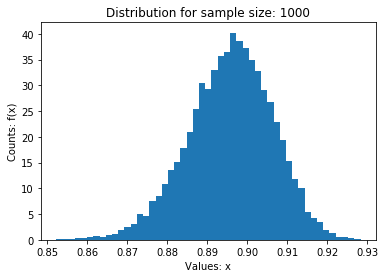

In [240]:
plotDistrib(1000, {1000:betas})

**Properties of the OLS estimator**:
* **Not consistent** because of regressor endogeneity due to a missing variable (even weak exogeneity is violated). In this case, this also shows in serial correlation in the errors. 

As a side note, estimator is also normal, since it depends on normal shocks.

## Autocorrelation of the OLS errors

(999,)

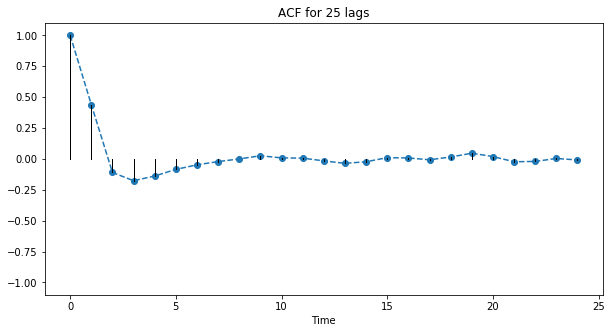

In [8]:
simTimeSeries = TimeSeries(q1.simulate(length = T))
ar = simTimeSeries.estimateAR(1, addConstant = False)
ar.computeCovMatrix(heter = False)
ts_q1 = TimeSeries(ar.resid)
ts_q1.plotAcf()
ar.resid.shape

(This must be wrong... somehow)

## Computing the autocorrelations of the OLS error

## Computing the IV estimator

# Question 5

## Simulation of 100 MA values and MLE estimation

In [200]:
q5 = ARMA(ma = [0.5], constant = 1)
y = q5.simulate(length = 100)
result = minimize(to_minimize_ma, [0.2, 0.5, 0.9], args = (y, 1))
result.x

array([1.19878478, 0.42594692, 0.94675008])

## Computing the standard error (Fisher information ???)

## Comparing with results from statsmodels

In [201]:
vs = statsmodels.tsa.arima_model.ARMA(y, (0, 1))
vs.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 1)   Log Likelihood                -136.743
Method:                       css-mle   S.D. of innovations              0.949
Date:                Thu, 16 Apr 2020   AIC                            279.486
Time:                        15:30:51   BIC                            287.302
Sample:                             0   HQIC                           282.649
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1909      0.134      8.913      0.000       0.929       1.453
ma.L1.y        0.4121      0.103      4.001      0.000       0.210       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.4263           +0.0000j            2.4263            0.5000
-----------------------------------------------------------------------------
"""

Our model and Statsmodels' obtain similar results.

# Helper functions

In [159]:
from scipy.optimize import minimize
def log_likelihood(w, y, e0 = 0):
    ''' the log likelihood function for MA(1). Parameters:
    *** list w = [mu, theta, sigma] with
        ****** mu: the MA mean
        ****** theta: the MA coefficient
        ****** sigma: the volatility of the White noise
    *** y: values taken by the ma (array)
    *** e0: the fixed, initial value of the first disturbance
    '''
    s = 0
    T = y.size
    eps = e0 # current shock
    for val in y:
        s += (eps**2) / (2 * w[2]**2)
        eps = val - w[0] - w[1] * eps
    return (- T / 2) * np.log(2 * np.pi) - (T / 2) * np.log(w[2]**2) - s

def to_minimize_ma(w, y, e0 = 0):
    return - log_likelihood(w, y, e0 = 0)

In [194]:
import statsmodels